In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
data_train= pd.read_csv(r"Train.csv")
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data_test= pd.read_csv(r"Test.csv")
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
data_train.shape

(8523, 12)

In [5]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
data_train.isnull().sum()/data_train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
 data_train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

Text(0.5, 1.0, 'Item_Weight_Boxplot')

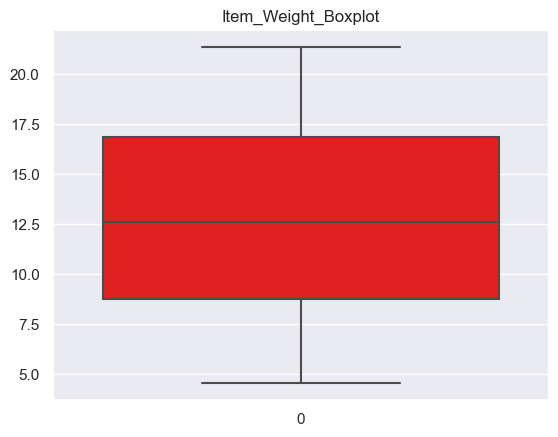

In [9]:
sns.boxplot(data = data_train['Item_Weight'], orient = 'v', color = 'r')
plt.title("Item_Weight_Boxplot")

In [10]:
data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean(),inplace=True)   #Train
data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean(),inplace=True)     #Test

In [11]:
data_train['Item_Weight'].isnull().sum(), data_test['Item_Weight'].isnull().sum()

(0, 0)

In [12]:
data_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
data_train['Outlet_Size'].mode()
data_test['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0],inplace=True)
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0],inplace=True)

In [15]:
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [17]:
data_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [18]:
data_train.replace({'Item_Fat_Content':{'Low Fat': 'LF', 'low fat':'LF','reg':'Regular'}},inplace=True)
data_test.replace({'Item_Fat_Content':{'Low Fat': 'LF', 'low fat':'LF','reg':'Regular'}},inplace=True)

In [19]:
data_train['Item_Fat_Content'].value_counts()  

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [20]:
data_test['Item_Fat_Content'].value_counts()  

Item_Fat_Content
LF         3668
Regular    2013
Name: count, dtype: int64

In [21]:
data_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
data_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [22]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,LF,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,LF,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,LF,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
data_train.duplicated().any()

False

In [24]:
data_test.duplicated().any()

False

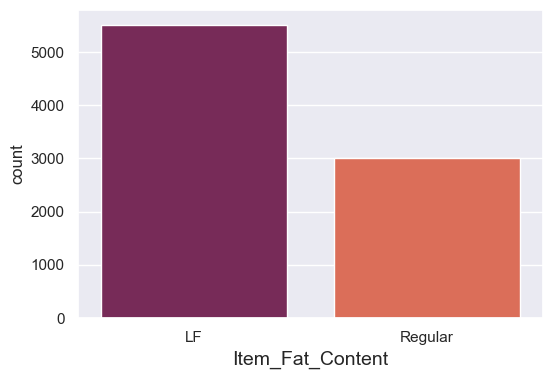

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=data_train ,palette='rocket')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

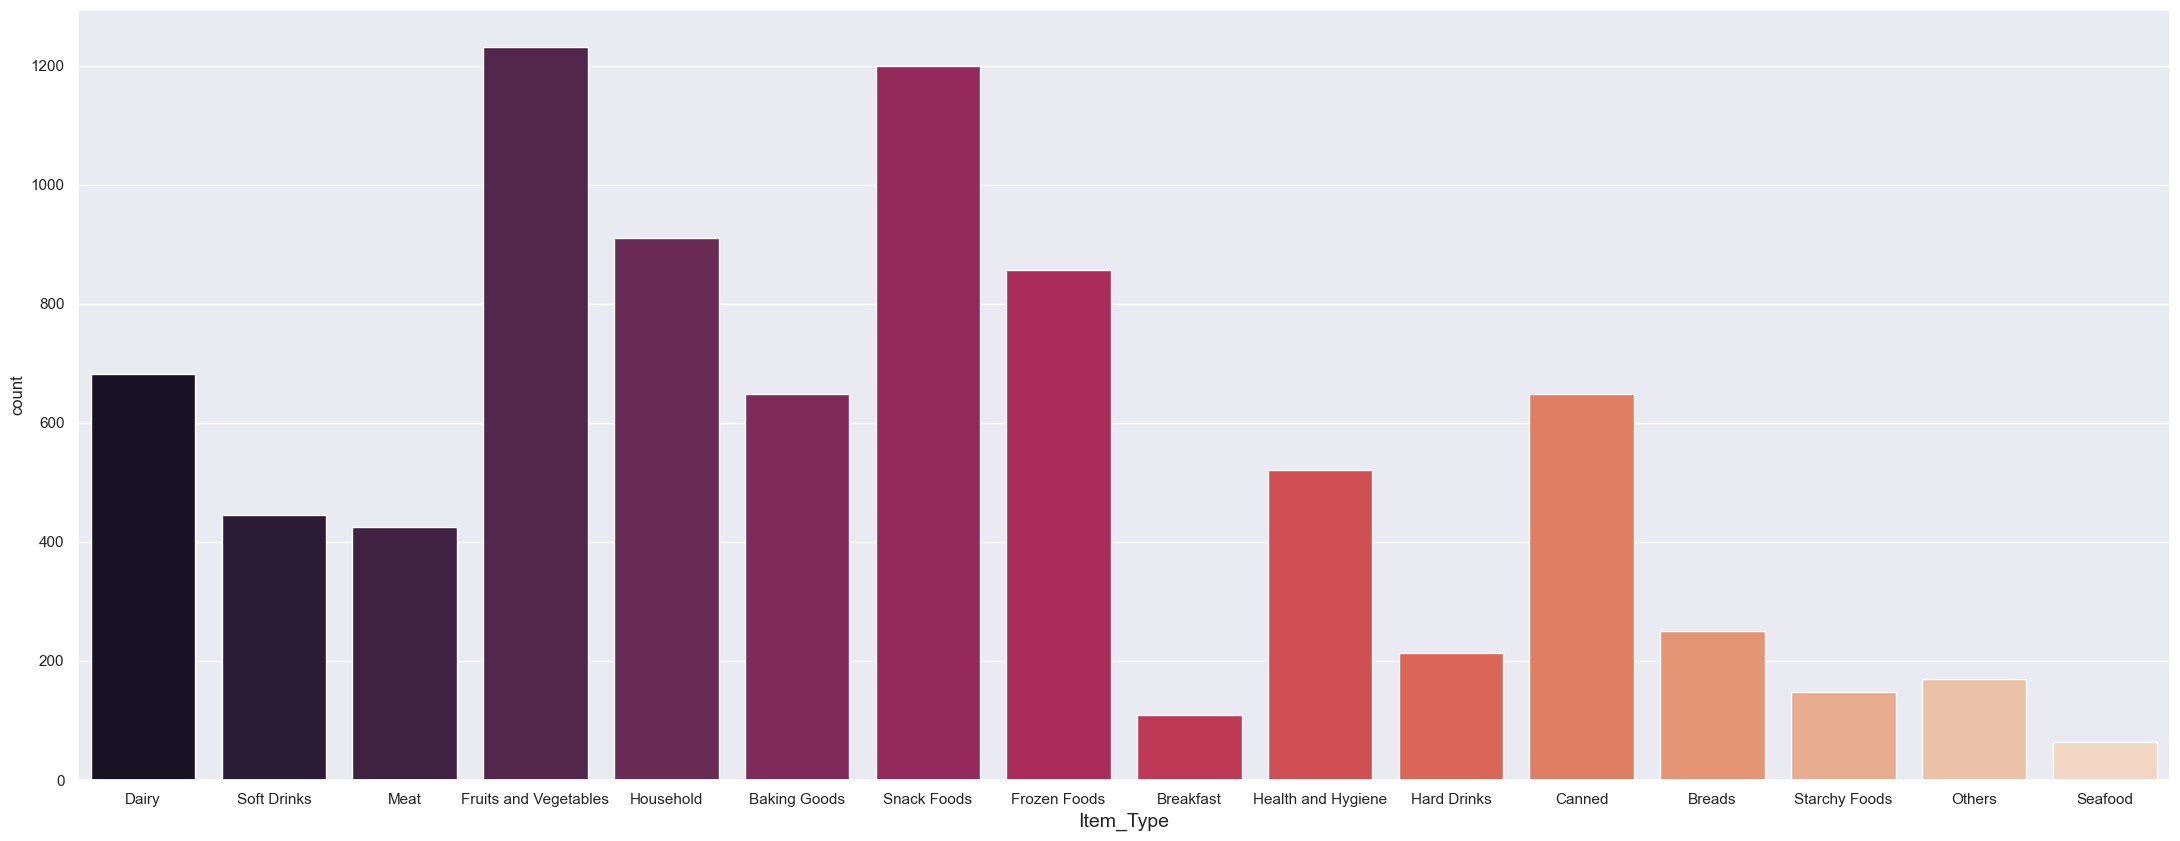

In [26]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=data_train ,palette='rocket')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

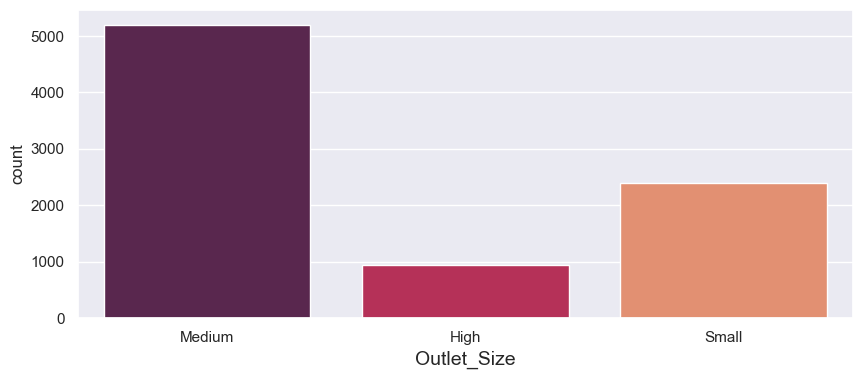

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=data_train ,palette='rocket')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

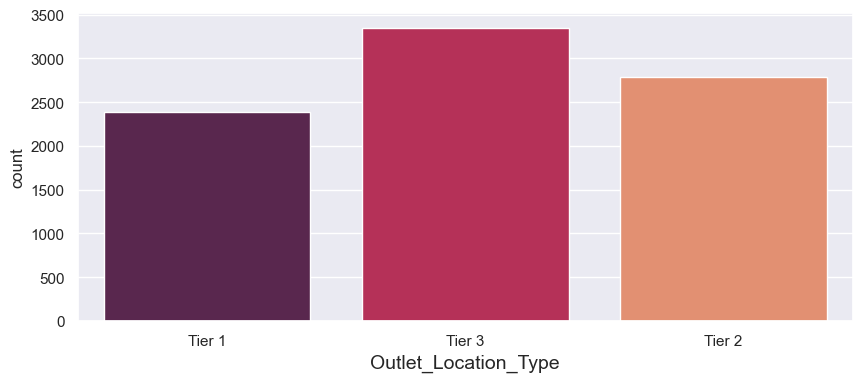

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=data_train ,palette='rocket')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

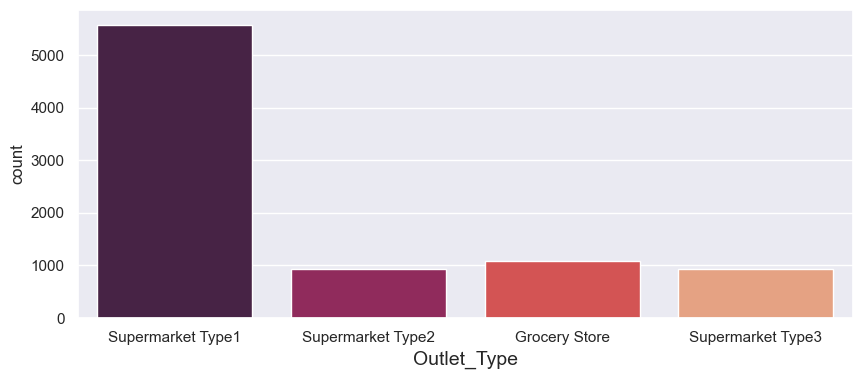

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=data_train ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

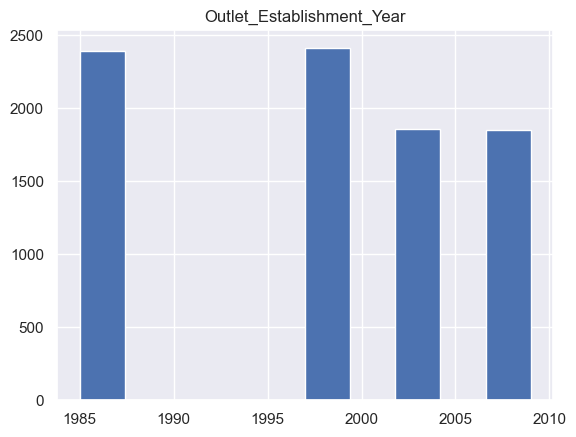

In [30]:
plt.hist(data_train['Outlet_Establishment_Year'])
plt.title("Outlet_Establishment_Year")
plt.show()

In [31]:
num = data_train.select_dtypes('number').columns.to_list()
data_num =  data_train[num]

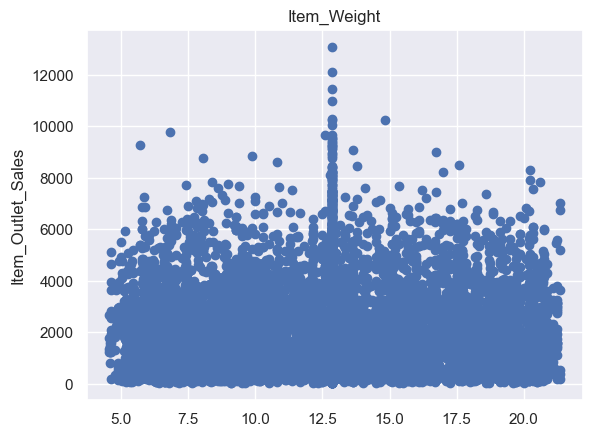

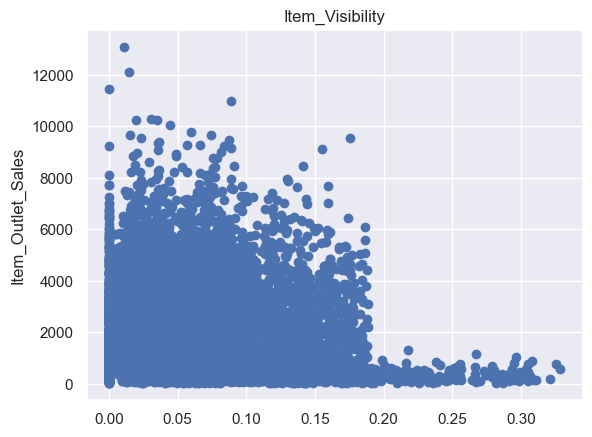

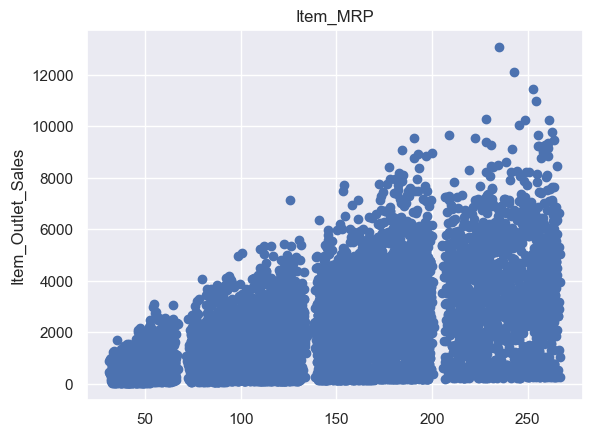

In [32]:
for numeric in data_num[num[:3]]:
    plt.scatter(data_num[numeric], data_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
data_train['Item_Fat_Content']= le.fit_transform(data_train['Item_Fat_Content'])
data_train['Item_Type']= le.fit_transform(data_train['Item_Type'])
data_train['Outlet_Size']= le.fit_transform(data_train['Outlet_Size'])
data_train['Outlet_Location_Type']= le.fit_transform(data_train['Outlet_Location_Type'])
data_train['Outlet_Type']= le.fit_transform(data_train['Outlet_Type'])

In [35]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [36]:
X=data_train.drop('Item_Outlet_Sales',axis=1)

In [37]:
Y=data_train['Item_Outlet_Sales']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [39]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc= StandardScaler()

In [41]:
X_train_std= sc.fit_transform(X_train)

In [42]:
X_test_std= sc.transform(X_test)

In [43]:
X_train_std

array([[ 1.52290029, -0.74155088,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.74155088, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  1.34852514, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.74155088, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  1.34852514,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.74155088,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [44]:
X_test_std

array([[-0.43860915, -0.74155088, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.74155088, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  1.34852514,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.74155088,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.74155088, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  1.34852514, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [45]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [46]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [93]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,1998,1,2,0
4,8.93,0,0.000000,9,53.8614,1987,0,2,1


In [94]:
joblib.dump(sc,r'C:\Users\Admin\BMP\sc.sav')

['C:\\Users\\Admin\\BMP\\sc.sav']

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [49]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [50]:
y_pred_lr=lr.predict(X_test_std)

In [51]:
train_score_ = lr.score(X_train,Y_train)
train_score_

-9677.926598985974

In [52]:
r2_score(Y_test,y_pred_lr)

0.5040717488447086

In [53]:
print(f"R2_score:")
print(r2_score(Y_test,y_pred_lr))
print(f"MAE:")
print(mean_absolute_error(Y_test,y_pred_lr))
print(f"MSE:")
print(np.sqrt(mean_squared_error(Y_test,y_pred_lr)))

R2_score:
0.5040717488447086
MAE:
880.9630396797254
MSE:
1162.577037928033


In [54]:
rmse_ll=np.sqrt(mean_squared_error(Y_test,y_pred_lr))
rmse_ll

1162.577037928033

In [55]:
#cross val score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [56]:
kf2 = KFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
cv_score_ = cross_val_score(lr, X, Y, cv=kf2, scoring='r2')
print(f"Cross Val Score:{cv_score_}")
print(f'Mean R-squared: {np.mean(cv_score_)}')

Cross Val Score:[0.52413481 0.49805841 0.5064598  0.50539079 0.49715699]
Mean R-squared: 0.5062401589953286


In [58]:
print("Adjusted R2_score:")
print(1-(1-lr.score(X_train_std,Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train_std.shape[1]-1))

Adjusted R2_score:
0.5078560323615857


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [60]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor()

In [61]:
RF_train_score= rf.score(X_train,Y_train)
RF_train_score

-2.358237399985507

In [62]:
y_pred_rf= rf.predict(X_test_std)

In [63]:
r2_score(Y_test,y_pred_rf)

0.5480037740296206

In [64]:
print(f"R2_score:")
print(r2_score(Y_test,y_pred_rf))
print(f"MAE:")
print(mean_absolute_error(Y_test,y_pred_rf))
print(f"MSE:")
print(np.sqrt(mean_squared_error(Y_test,y_pred_rf)))

R2_score:
0.5480037740296206
MAE:
781.3505076715543
MSE:
1109.8894434740528


In [65]:
rmse=np.sqrt(mean_squared_error(Y_test,y_pred_rf))
rmse

1109.8894434740528

In [66]:
print("Adjusted R2_score:")
print(1-(1-rf.score(X_train_std,Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train_std.shape[1]-1))

Adjusted R2_score:
0.9377212043546485


In [67]:
kf2 = KFold(n_splits=5, shuffle=True, random_state=42)

In [68]:
cv_score_1 = cross_val_score(rf, X, Y, cv=kf2, scoring='r2')
print(f"Cross Val Score:{cv_score_1}")
print(f'Mean R-squared: {np.mean(cv_score_1)}')

Cross Val Score:[0.56588726 0.56513821 0.56073762 0.54817232 0.55115395]
Mean R-squared: 0.5582178728950031


In [69]:
from xgboost import XGBRegressor
xg= XGBRegressor()

In [70]:
xg.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred_xg= xg.predict(X_test_std)

In [72]:
train_score_ = xg.score(X_train,Y_train)
train_score_

-3.2311133746009135

In [73]:
r2_score(Y_test,y_pred_xg)

0.4948181007194078

In [74]:
print(f"R2_score:")
print(r2_score(Y_test,y_pred_xg))
print(f"MAE:")
print(mean_absolute_error(Y_test,y_pred_xg))
print(f"MSE:")
print(np.sqrt(mean_squared_error(Y_test,y_pred_xg)))

R2_score:
0.4948181007194078
MAE:
831.4582676389558
MSE:
1173.3733146069771


In [75]:
print("Adjusted R2_score:")
print(1-(1-xg.score(X_train_std,Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train_std.shape[1]-1))

Adjusted R2_score:
0.8696932451800372


In [76]:
# Creating KFold object
KF = KFold(n_splits=5, shuffle=True, random_state=42)

In [77]:
cv_scores = cross_val_score(xg, X, Y, cv=KF, scoring='neg_mean_squared_error')

In [78]:
# Converting negative MSE to positive RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

In [79]:
print(f"CV RMSE Scores: {cv_rmse_scores}")
print(f"Mean RMSE: {np.mean(cv_rmse_scores)}")

CV RMSE Scores: [1143.33035988 1168.03098858 1184.0212507  1217.0503749  1227.91603466]
Mean RMSE: 1188.0698017424556


In [80]:
KF1 = KFold(n_splits=6, shuffle=True, random_state=42)

In [81]:
cv_scores_r2 = cross_val_score(xg, X, Y, cv=KF1, scoring='r2')

In [82]:
print(f'Cross-Validation R-squared Scores: {cv_scores_r2}')
print(f'Mean R-squared: {np.mean(cv_scores_r2)}')

Cross-Validation R-squared Scores: [0.56627546 0.51444945 0.52299082 0.51968348 0.51532209 0.50660105]
Mean R-squared: 0.5242203906806999


In [83]:
RandomForest_data = {
    'Model': ['Random Forest'],
    'MAE':[805.06],
    'MSE': [1157.65],
    'RMSE': [1158.41],
    'R2 Score': [0.54],
    'Adjusted R2 Score': [0.93],
    'Cross-Validation Score': [0.54]
}

Linear_Regression= {
    'Model': ['Linear Regression'],
    'MAE':[837.74],
    'MSE': [1133.81],
    'RMSE': [1133.81],
    'R2 Score': [0.55],
    'Adjusted R2 Score': [0.55],
    'Cross-Validation Score': [0.54]
}


XGBOOST_data = {
    'Model': ['XGBoost'],
    'MAE':[881.71],
    'MSE': [1249.82],
    'R2 Score': [0.46],
    'Adjusted R2 Score': [0.97],
    'Cross-Validation Score': [0.53],
}

In [84]:
RANDOMFOREST_df = pd.DataFrame(RandomForest_data)
Linear_Regression_df = pd.DataFrame(Linear_Regression)
XGBOOST_df = pd.DataFrame(XGBOOST_data)
# Concatenate DataFrames
summary_table = pd.concat([RANDOMFOREST_df, Linear_Regression_df, XGBOOST_df], ignore_index=True)

In [85]:
summary_table

,Model,MAE,MSE,RMSE,R2 Score,Adjusted R2 Score,Cross-Validation Score
0,Random Forest,805.06,1157.65,1158.41,0.54,0.93,0.54
1,Linear Regression,837.74,1133.81,1133.81,0.55,0.55,0.54
2,XGBoost,881.71,1249.82,NaN,0.46,0.97,0.53


In [88]:
import joblib

In [89]:
joblib.dump(lr,r'C:\Users\Admin\BMP\lr.sav')

['C:\\Users\\Admin\\BMP\\lr.sav']

In [90]:
loaded_model = joblib.load(r'C:\Users\Admin\BMP\lr.sav')

In [91]:
loaded_model.predict(X_test_std)

array([2035.42799595, 2123.49261185, 1226.10179339, ..., 1269.90237555,
       2351.67647119, 2373.64397136])